# Data Visualization Portfolio - Life Expectancy & GDP

## Introduction

For this project, we are analyzing data on GDP and life expectancy from the World Health Organization and the World Bank. 

We will investigate and plot graphs on different features using Matplotlib:

    1. GDP of different countries over the years
    2. Life expectancy at birth of different countries over the years
    3. Try and identify the relationship between the GDP and life expectancy of six countries.

## Analysis

### Preparations

For the preparation phase, the data is loaded and cleaned for further analysis.

In [1]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# load and clean data
df = pd.read_csv("all_data.csv")

# as GDP values are too large, we express GDP values in trillions
df["GDP"] = df["GDP"].apply(lambda x: x/1000000000000)

# as Life expectancy columns's column name is too long, rename to shorter one
df.rename(columns={
    "Life expectancy at birth (years)": "Life expectancy"
}, inplace=True)

# create list of countries for future use
country_list = ["Chile", "China", "Germany", "Mexico", "United States of America", "Zimbabwe"]

print(df.head(20))
print(df.info())

   Country  Year  Life expectancy       GDP
0    Chile  2000             77.3  0.077861
1    Chile  2001             77.3  0.070980
2    Chile  2002             77.8  0.069737
3    Chile  2003             77.9  0.075643
4    Chile  2004             78.0  0.099210
5    Chile  2005             78.4  0.122965
6    Chile  2006             78.9  0.154788
7    Chile  2007             78.9  0.173606
8    Chile  2008             79.6  0.179638
9    Chile  2009             79.3  0.172389
10   Chile  2010             79.1  0.218538
11   Chile  2011             79.8  0.252252
12   Chile  2012             79.9  0.267122
13   Chile  2013             80.1  0.278384
14   Chile  2014             80.3  0.260990
15   Chile  2015             80.5  0.242518
16   China  2000             71.7  1.211350
17   China  2001             72.2  1.339400
18   China  2002             72.7  1.470550
19   China  2003             73.1  1.660290
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data c

### Investigation 1 - GDP of different countries over the years

For this investigation, we will plot individual line graphs of GDP against years for all the countries in the database first.

In [3]:
# function to plot GDP graphs in each subplot
def plot_gdp_over_years(country, i):
    country_df = df[df["Country"] == country]
    years = country_df["Year"].values.tolist()
    gdp = country_df["GDP"].values.tolist()
    
    plt.subplot(2, 3, i)
    plt.plot(years, gdp)
    plt.xlabel("Year")
    plt.ylabel("GDP (in trillions)")
    plt.title("GDP of " + country + " from 2000 to 2015")

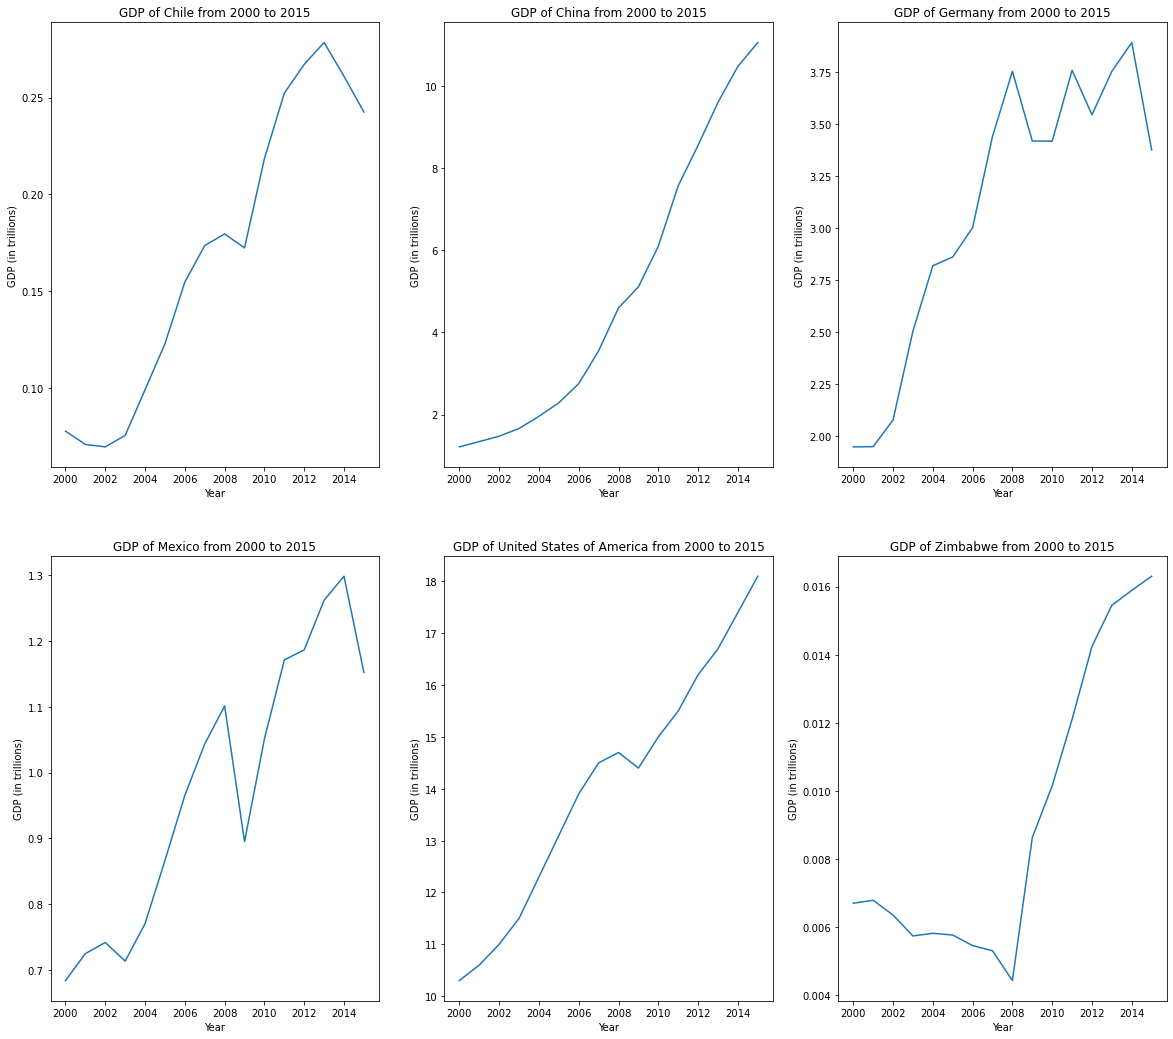

<Figure size 432x288 with 0 Axes>

In [4]:
# plot individual GDP graphs
plt.figure(figsize=(20, 18))
for i in range(1, 7):
    plot_gdp_over_years(country_list[i-1], i)
plt.show()
plt.clf()

We plot a combined GDP graph to compare GDPs of different countries over the years.

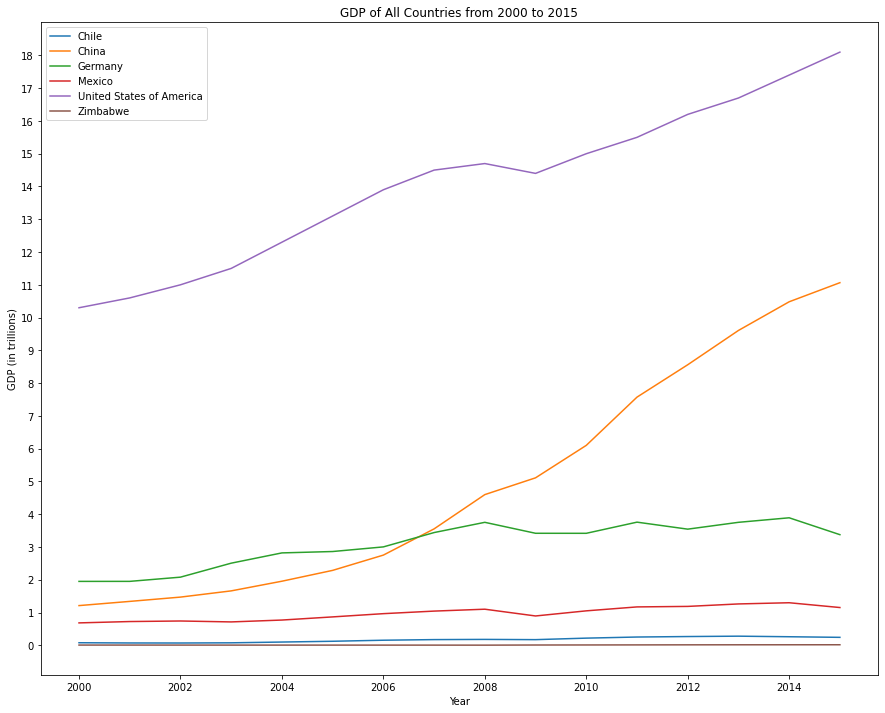

<Figure size 432x288 with 0 Axes>

In [5]:
# plot a combined GDP graph
def plot_all_gdp_graphs(country_list):
    for country in country_list:
        country_df = df[df["Country"] == country]
        years = country_df["Year"].values.tolist()
        gdp = country_df["GDP"].values.tolist()
        plt.plot(years, gdp)

plt.figure(figsize=(15, 12))
ax = plt.subplot()
plot_all_gdp_graphs(country_list)   
plt.legend(country_list)
plt.xlabel("Year")
ax.set_yticks(range(0, 19))
plt.ylabel("GDP (in trillions)")
plt.title("GDP of All Countries from 2000 to 2015")
plt.show()
plt.clf()

From the above graphs, we can conclude a few things:

1. Overall, all countries' GDP is increasing from 2000 to 2015. 
2. US has the highest GDP of all times, while Zimbabwe has the lowest GDP of all times.
3. China has the most growth of GDP in the said period, increasing from under 1 trillion in 2000 to over 11 trillion in 2015, which is approximately a 1000% increase.
4. Mexico has the least growth in GDP in the said period, increasing from around 0.7 trillion in 2000 to 1.15 trillion in 2015, approximately a 65% increase.
5. For Chile, Germany, and Mexico, their GDPs have started to decline from 2013-2014.
6. GDP of China has surpassed that of Germany in 2007, and the difference between the GDP of China and the US has been decreasing over the years.

### Investigation 2 - Life expectancy of different countries over the years

For this investigation, we will plot individual line graphs of life expectancy against years for all the countries in the database first.

In [6]:
# function to plot life expectancy graphs in each subplot
def plot_life_expectancy_over_years(country, i):
    country_df = df[df["Country"] == country]
    years = country_df["Year"].values.tolist()
    life_expectancy = country_df["Life expectancy"].values.tolist()
    
    plt.subplot(2, 3, i)
    plt.plot(years, life_expectancy)
    plt.xlabel("Year")
    plt.ylabel("Life expectancy at birth (years)")
    plt.title("Life Expectancy of " + country + " from 2000 to 2015")

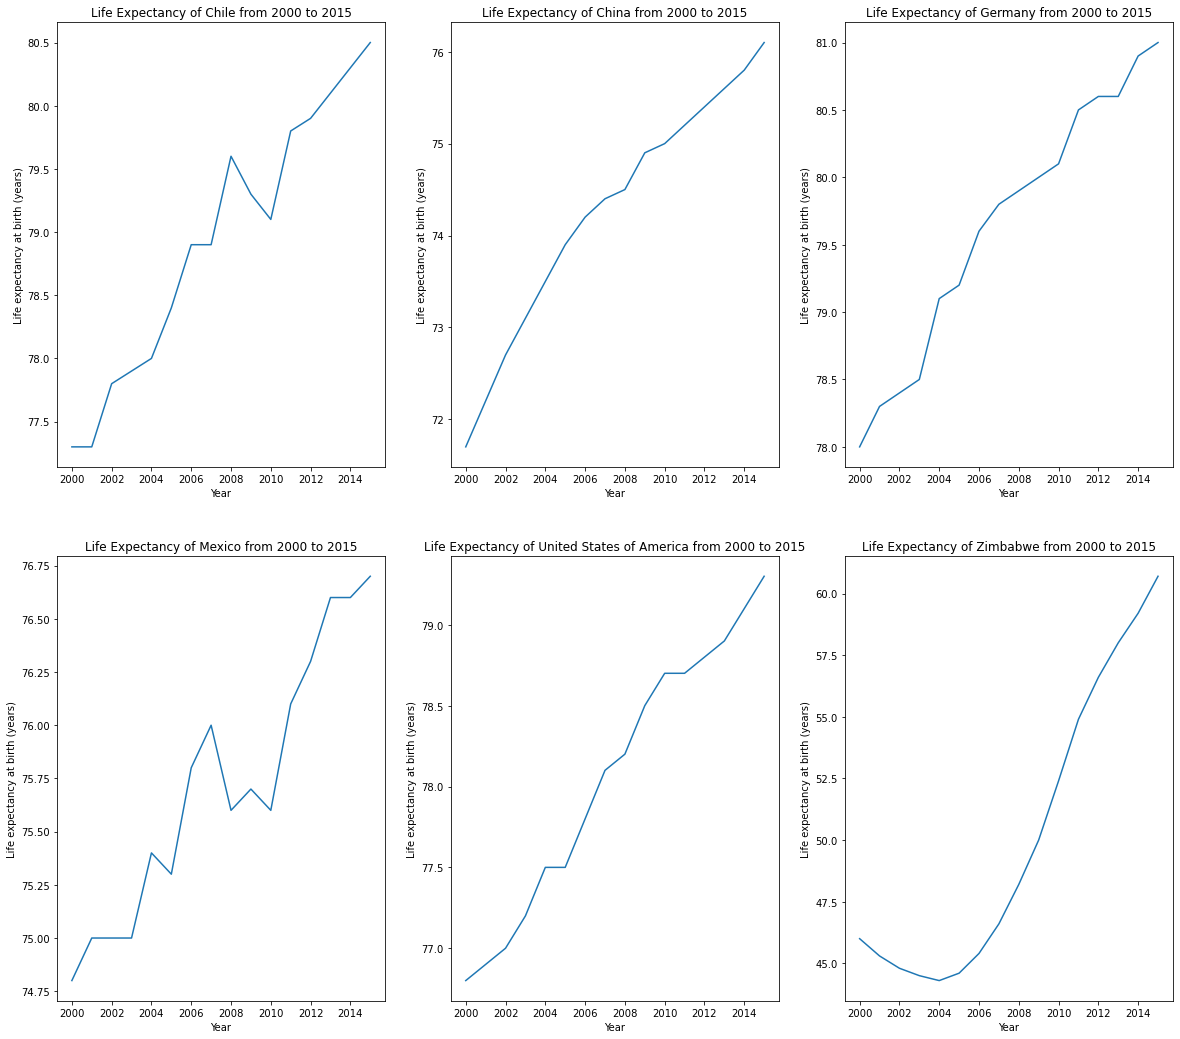

<Figure size 432x288 with 0 Axes>

In [7]:
# plot individual life expectancy graphs
plt.figure(figsize=(20, 18))
for i in range(1, 7):
    plot_life_expectancy_over_years(country_list[i-1], i)
plt.show()
plt.clf()

We plot a combined GDP graph to compare GDPs of different countries over the years.

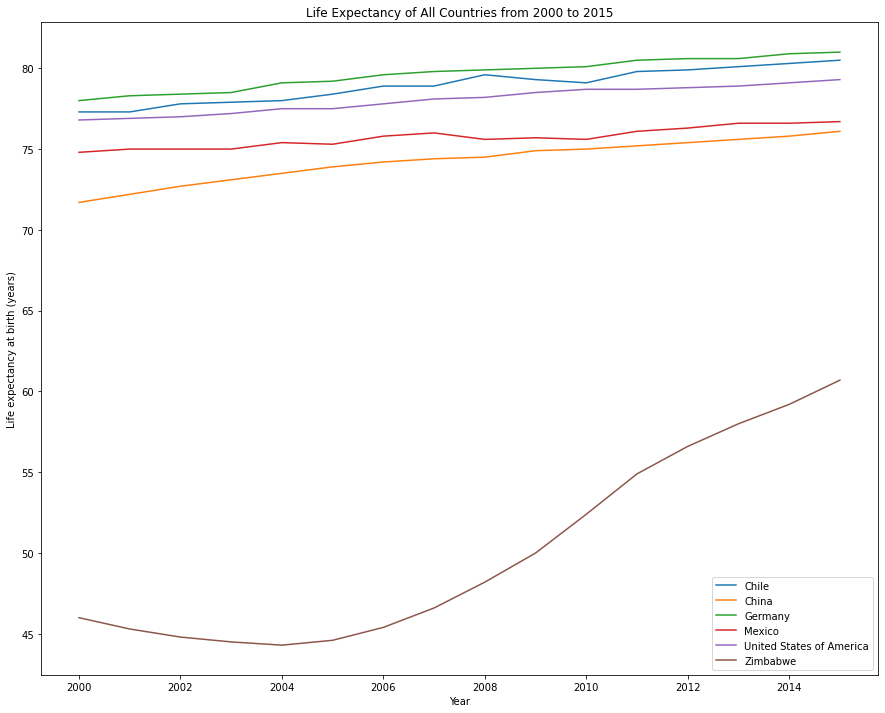

<Figure size 432x288 with 0 Axes>

In [8]:
# plot a combined life expectancy graph
def plot_all_life_expectancy_graphs(country_list):
    for country in country_list:
        country_df = df[df["Country"] == country]
        years = country_df["Year"].values.tolist()
        life_expectancy = country_df["Life expectancy"].values.tolist()
        plt.plot(years, life_expectancy)

plt.figure(figsize=(15, 12))
plot_all_life_expectancy_graphs(country_list)   
plt.legend(country_list)
plt.xlabel("Year")
plt.ylabel("Life expectancy at birth (years)")
plt.title("Life Expectancy of All Countries from 2000 to 2015")
plt.show()
plt.clf()

From the above graphs, we can conclude a few things:

1. Overall, all countries' life expectancy is increasing from 2000 to 2015.
2. Germany has the highest life expectancy at birth of all times, while Zimbabwe has the lowest life expectancy of all times.
3. Zimbabwe has the most growth in life expectancy in the said period, increasing from around 46 years in 2000 to around 62 years in 2015, which is approximately a 35% increase. However, at first, the life expectancy in Zimbabwe dipped from 2000 to 2004 but increased from 2004 onwards.
4. Mexico has the least growth in life expectancy in the said period, increasing from around 74.8 years in 2000 to 76.8 in 2015, approximately a 2.7% increase.

### Investigation 3 - Relationship between GDP and life expectancy

We will answer the following question in this investigation: Does the increase in GDP correlate to the increase in life expectancy of different countries?
To answer this question, we will plot scatter plots of life expectancy at birth against GDP for individual countries.

In [9]:
# function to plot scatter plots in each subplot
def plot_scatter_plots(country, i):
    country_df = df[df["Country"] == country]
    gdp = country_df["GDP"].values.tolist()
    life_expectancy = country_df["Life expectancy"].values.tolist()
    
    plt.subplot(2, 3, i)
    plt.scatter(gdp, life_expectancy)
    plt.xlabel("GDP (in trillions)")
    plt.ylabel("Life expectancy at birth (years)")
    plt.title("GDP vs Life Expectancy for " + country)

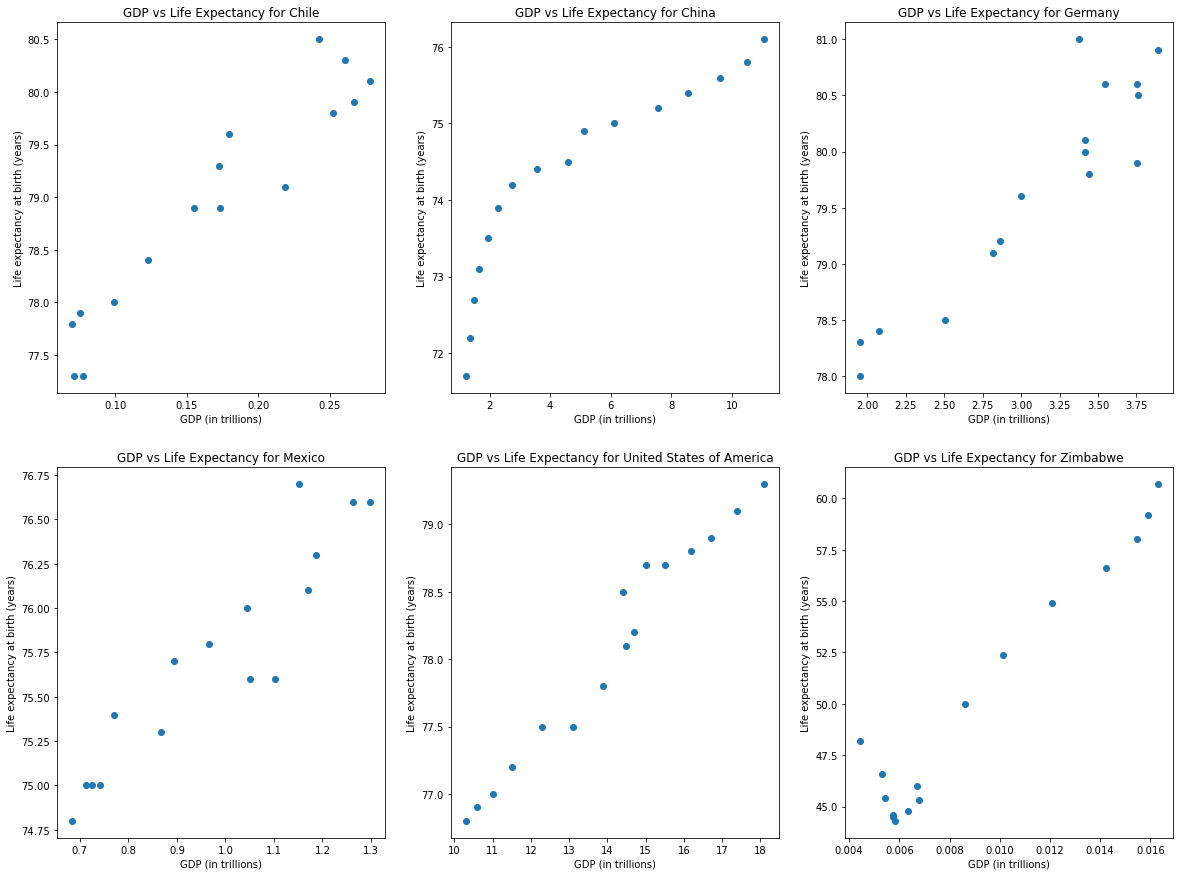

<Figure size 432x288 with 0 Axes>

In [10]:
# plot individual scatter plots
plt.figure(figsize=(20, 15))
for i in range(1, 7):
    plot_scatter_plots(country_list[i-1], i)
plt.show()
plt.clf()

Based on the above graphs, most countries show a linear relationship between GDP and life expectancy, except for China, which seemingly shows a curved relationship. Nevertheless, all countries showed a positive relationship between GDP and life expectancy at birth, i.e. when GDP increases, life expectancy increases.
We can conclude GDP has a positive correlation with life expectancy at birth.